**Stacked LSTM**

**A stacked LSTM** (Long Short-Term Memory) in deep learning refers to a neural network architecture where multiple LSTM layers are placed on top of each other. This stacking allows the network to capture more complex patterns in the data by learning hierarchical representations.

Here’s a breakdown of what a stacked LSTM is and why it is used:

LSTM Overview LSTM is a type of Recurrent Neural Network (RNN) designed to handle the vanishing gradient problem, making it more effective for learning long-term dependencies in sequential data. An LSTM unit typically consists of a cell, an input gate, an output gate, and a forget gate, which help regulate the flow of information.

## Stacked LSTM
Definition: A stacked LSTM consists of multiple LSTM layers where the output of one layer is used as the input for the next layer. Architecture: In a typical stacked LSTM architecture, the sequence data is fed into the first LSTM layer. The output of this layer is then fed into the second LSTM layer, and so on. Purpose: By stacking LSTM layers, the network can learn more abstract and high-level features of the input sequence at each successive layer. Lower layers can learn simple patterns, while higher layers can learn more complex structures.

### steps we gonna follow
1. We will collect the stock data of APPLE
2. Preprocess the Data - Train and test
3. Create an stacked LSTM model
4. Predcit the test data and plot the output
5. Predict the future 30 days and plot the output

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('/content/AAPL.csv')

In [4]:
df.head()

,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,0,AAPL,2015-05-27 00:00:00+00:00,132.045,132.260,130.05,130.34,45833246,121.682558,121.880685,119.844118,120.111360,45833246,0.0,1.0
1,1,AAPL,2015-05-28 00:00:00+00:00,131.780,131.950,131.10,131.86,30733309,121.438354,121.595013,120.811718,121.512076,30733309,0.0,1.0
2,2,AAPL,2015-05-29 00:00:00+00:00,130.280,131.450,129.90,131.23,50884452,120.056069,121.134251,119.705890,120.931516,50884452,0.0,1.0
3,3,AAPL,2015-06-01 00:00:00+00:00,130.535,131.390,130.05,131.20,32112797,120.291057,121.078960,119.844118,120.903870,32112797,0.0,1.0
4,4,AAPL,2015-06-02 00:00:00+00:00,129.960,130.655,129.32,129.86,33667627,119.761181,120.401640,119.171406,119.669029,33667627,0.0,1.0


In [5]:
df.tail()

,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1253,1253,AAPL,2020-05-18 00:00:00+00:00,314.96,316.50,310.3241,313.17,33843125,314.96,316.50,310.3241,313.17,33843125,0.0,1.0
1254,1254,AAPL,2020-05-19 00:00:00+00:00,313.14,318.52,313.0100,315.03,25432385,313.14,318.52,313.0100,315.03,25432385,0.0,1.0
1255,1255,AAPL,2020-05-20 00:00:00+00:00,319.23,319.52,316.2000,316.68,27876215,319.23,319.52,316.2000,316.68,27876215,0.0,1.0
1256,1256,AAPL,2020-05-21 00:00:00+00:00,316.85,320.89,315.8700,318.66,25672211,316.85,320.89,315.8700,318.66,25672211,0.0,1.0
1257,1257,AAPL,2020-05-22 00:00:00+00:00,318.89,319.23,315.3500,315.77,20450754,318.89,319.23,315.3500,315.77,20450754,0.0,1.0


In [7]:
df1 = df.reset_index()['close']

In [8]:
df1.shape

(1258,)

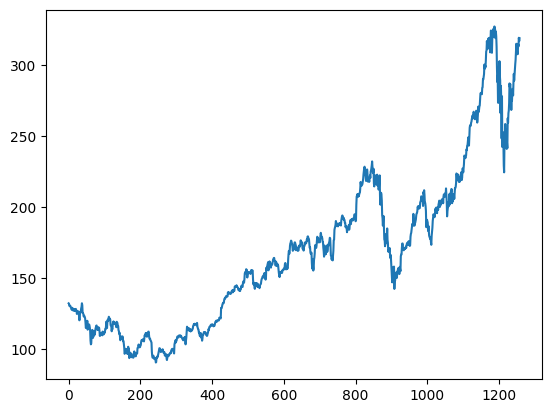

In [9]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [10]:
### LSTM are sensitive to the scale of the data. so we apply Minmax scaler.
#it transforms our values between 0 to 1.

In [11]:
df1

0       132.045
1       131.780
2       130.280
3       130.535
4       129.960
         ...   
1253    314.960
1254    313.140
1255    319.230
1256    316.850
1257    318.890
Name: close, Length: 1258, dtype: float64

In [12]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))

In [13]:
print(df1)

[[0.17607447]
 [0.17495567]
 [0.16862282]
 ...
 [0.96635143]
 [0.9563033 ]
 [0.96491598]]


In [14]:
## in timeseries data, the values of stock are dependent on previous values i.e previous dates
## i.e, some % of values for training and remianing for validation and testing

In [15]:
#splitting dataset into train and test split
training_size = int(len(df1)*0.65)
test_size = len(df1) - training_size
train_data, test_data = df1[0:training_size,:], df1[training_size:len(df1),:1]


In [16]:
training_size, test_size

(817, 441)

In [17]:
len(train_data), len(test_data)

(817, 441)

In [18]:
train_data

array([[0.17607447],
       [0.17495567],
       [0.16862282],
       [0.1696994 ],
       [0.16727181],
       [0.16794731],
       [0.16473866],
       [0.16174111],
       [0.1581525 ],
       [0.15654817],
       [0.16271215],
       [0.1614878 ],
       [0.1554927 ],
       [0.15443722],
       [0.15730811],
       [0.15604154],
       [0.15849025],
       [0.15308621],
       [0.15735033],
       [0.15490163],
       [0.15946129],
       [0.15688592],
       [0.1537195 ],
       [0.14434687],
       [0.14812547],
       [0.15308621],
       [0.15241071],
       [0.15055307],
       [0.14924428],
       [0.13607194],
       [0.12551718],
       [0.13906949],
       [0.14911762],
       [0.14890653],
       [0.15401503],
       [0.16115005],
       [0.16583636],
       [0.17618002],
       [0.17060711],
       [0.14725998],
       [0.14700667],
       [0.14422021],
       [0.13691632],
       [0.13949168],
       [0.13784514],
       [0.13522756],
       [0.13071012],
       [0.118

In [19]:
#now we need to do preprocesssing
#here  we need to consider time steps. i.e, to predict next day value we have to depend on previous days values.
#in this way we are making independent, dependent features using timesteps

In [20]:
#convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
  dataX, dataY = [], []
  for i in range(len(dataset)-time_step-1):
    a = dataset[i:(i+time_step), 0]          ###i = 0,1,2,3----99 100
    dataX.append(a)
    dataY.append(dataset[i + time_step, 0])
  return np.array(dataX), np.array(dataY)

In [21]:
#reshape into X=t,t+1,t+2 and Y = t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [22]:
print(X_train)

[[0.17607447 0.17495567 0.16862282 ... 0.09055982 0.08388922 0.09085536]
 [0.17495567 0.16862282 0.1696994  ... 0.08388922 0.09085536 0.0873934 ]
 [0.16862282 0.1696994  0.16727181 ... 0.09085536 0.0873934  0.09030651]
 ...
 [0.34801148 0.32930845 0.32145571 ... 0.50042219 0.50413747 0.5062062 ]
 [0.32930845 0.32145571 0.32694419 ... 0.50413747 0.5062062  0.51920966]
 [0.32145571 0.32694419 0.32230009 ... 0.5062062  0.51920966 0.53719497]]


In [23]:
print(X_train.shape), print(y_train.shape)

(716, 100)
(716,)


(None, None)

In [24]:
print(X_test.shape), print(y_test.shape)

(340, 100)
(340,)


(None, None)

In [25]:
#reshape into 3D i.e, input to be [samples, timesteps, features] which is required for LSTM
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [26]:
## create the stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [27]:
model= Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [29]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 11s 369ms/step - loss: 0.0117 - val_loss: 0.0602
Epoch 2/100
12/12 [==============================] - 2s 201ms/step - loss: 0.0027 - val_loss: 0.0048
Epoch 3/100
12/12 [==============================] - 3s 245ms/step - loss: 9.4487e-04 - val_loss: 0.0039
Epoch 4/100
12/12 [==============================] - 3s 274ms/step - loss: 7.3822e-04 - val_loss: 0.0069
Epoch 5/100
12/12 [==============================] - 2s 201ms/step - loss: 6.1660e-04 - val_loss: 0.0073
Epoch 6/100
12/12 [==============================] - 2s 199ms/step - loss: 6.3106e-04 - val_loss: 0.0058
Epoch 7/100
12/12 [==============================] - 2s 199ms/step - loss: 6.2390e-04 - val_loss: 0.0065
Epoch 8/100
12/12 [==============================] - 3s 215ms/step - loss: 6.6579e-04 - val_loss: 0.0049
Epoch 9/100
12/12 [==============================] - 4s 304ms/step - loss: 5.8208e-04 - val_loss: 0.0043
Epoch 10/100
12/12 [==============================] - 2s 197ms

In [30]:
##lets do prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

11/11 [==============================] - 0s 41ms/step


In [31]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [32]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

141.58720707218902

In [33]:
### Test Data RMSE
math.sqrt(mean_squared_error(y_test,test_predict))

235.35019150460369

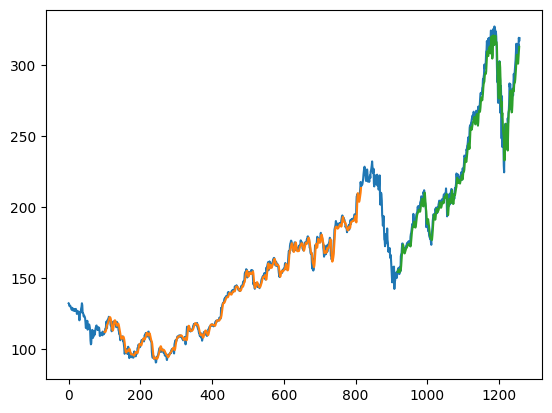

In [36]:
import numpy
### Plotting
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [ ]:
#now predicting next 30 days
#suppose 9th july to predcit on 10th july, i need to take previous 100 days data

In [37]:
len(test_data)

441

In [38]:
x_input = test_data[341:].reshape(1,-1)
x_input.shape

(1, 100)

In [39]:
#converting into list
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

In [40]:
temp_input

[0.8583551465000423,
 0.8866418981676942,
 0.8743139407244789,
 0.8843198513890065,
 0.8783669678290975,
 0.8986321033521913,
 0.925821160179009,
 0.9287764924427933,
 0.9567677108840666,
 0.9386979650426415,
 0.933040614709111,
 0.9495060373216249,
 0.9642404796082076,
 0.9551211686228154,
 0.9598919192772104,
 0.9663514312251966,
 0.9624672802499368,
 0.9229502659799038,
 0.9598497002448705,
 0.9879253567508233,
 0.985941062230854,
 0.9253145317909315,
 0.9217259140420504,
 0.964747107996285,
 0.9757240564046274,
 0.9915984125643842,
 0.9697289538123788,
 0.9761462467280253,
 0.9679557544541082,
 1.0000000000000002,
 0.9901629654648318,
 0.9905007177235499,
 0.9653803934813816,
 0.9848855864223593,
 0.9708688676855528,
 0.9402600692392133,
 0.8774803681499621,
 0.8348391454867856,
 0.8541332432660644,
 0.7733682344000676,
 0.7726927298826314,
 0.8801401671873683,
 0.8400743054969182,
 0.8967322468969012,
 0.8552731571392387,
 0.8388499535590646,
 0.7423372456303303,
 0.82327113062568

In [41]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):

    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1


print(lst_output)

[0.9408833]
101
1 day input [0.8866419  0.87431394 0.88431985 0.87836697 0.8986321  0.92582116
 0.92877649 0.95676771 0.93869797 0.93304061 0.94950604 0.96424048
 0.95512117 0.95989192 0.96635143 0.96246728 0.92295027 0.9598497
 0.98792536 0.98594106 0.92531453 0.92172591 0.96474711 0.97572406
 0.99159841 0.96972895 0.97614625 0.96795575 1.         0.99016297
 0.99050072 0.96538039 0.98488559 0.97086887 0.94026007 0.87748037
 0.83483915 0.85413324 0.77336823 0.77269273 0.88014017 0.84007431
 0.89673225 0.85527316 0.83884995 0.74233725 0.82327113 0.78143207
 0.6665963  0.7921557  0.64118044 0.68614371 0.66001013 0.65203074
 0.58642236 0.56586169 0.66089673 0.65515494 0.70970193 0.66452757
 0.69437642 0.69218104 0.63569197 0.65266402 0.63780292 0.7267162
 0.71388162 0.74191506 0.75002111 0.77222832 0.83049059 0.8194292
 0.8289707  0.8125475  0.78776492 0.75162543 0.78426074 0.77974331
 0.81326522 0.8141096  0.79473106 0.83336148 0.85898843 0.83901883
 0.85628641 0.87486279 0.88782403 0.9

In [42]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [43]:

import matplotlib.pyplot as plt

In [44]:
len(df1)

1258

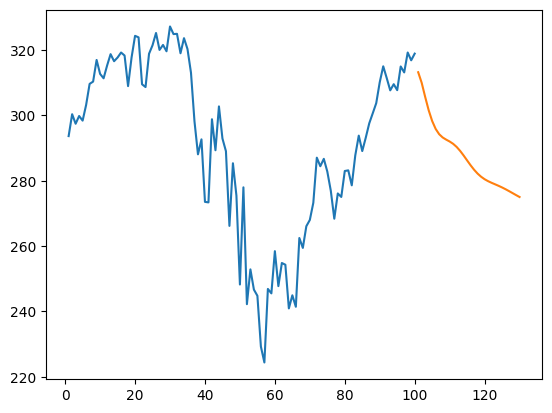

In [45]:
plt.plot(day_new,scaler.inverse_transform(df1[1158:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

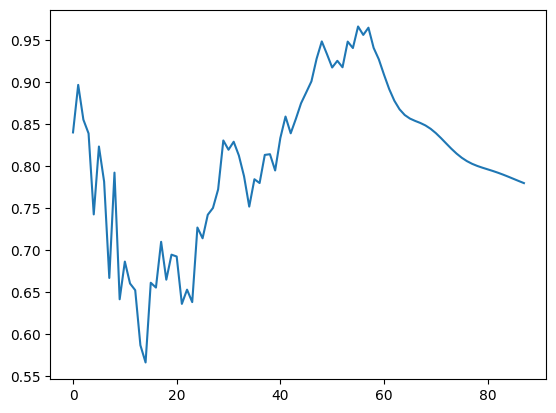

In [46]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])